## Problem Statement

A Portuguese bank is rolling out term deposit for its customers. They have in the past connected to their customer base through phone calls. Results for these previous campaigns were recorded and have been provided to the current campaign manager to use the same in making this campaign more effective.

Challenges that the manager faces are following:

•  Customers have recently started to complain that bank’s marketing staff bothers them with irrelevant product calls and this should  immediately stop

•  There is no prior framework for her decide and choose which customer to call and which one to leave alone

She has decided to use past data to automate this decision, instead of manually choosing through each and every customer. Previous campaign data which has been made available to her; contains customer characteristics , campaign characteristics, previous campaign information as well as whether customer ended up subscribing to the product as a result of that campaign or not. Using this she plans to develop a statistical model which given this information predicts whether customer in question will subscribe to the product or not. A successful model which is able to do this, will make her campaign efficiently targeted and less bothering to uninterested customers.

We have given you two datasets , bank-full_train.csv and bank-full_test.csv . You need to use data bank-full_train.csv to build predictive model for response variable “y”. bank-full_test.csv data contains all other factors except “y”, you need to predict that using the model that you developed and submit your predicted values in a csv files.

#### In solving this problem statement my notebook follow the below strategy

<center>

| Sr. No | Strategies                                                      |
|--------|:-----------------------------------------------------------------|
| 1      | Imputing NA values in the datasets                               |
| 2      | Data Preparation                                                |
| 3      | Model Building                                                  |
| 4      | Finding Cutoff value and Performance measurements of the model. |
| 5      | Predict the final output on test dataset (whether the client subscribes or not to term deposit) |
    
</center>

### 1.Imputing NA values in the datasets.

In [3]:
train = read.csv("bank-full_train.csv",stringsAsFactors = F)
test = read.csv("bank-full_test.csv",stringsAsFactors = F)

In [4]:
head(train)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,22944,no
2,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,13870,no
3,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,19301,yes
4,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,31334,yes
5,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,3849,no
6,36,services,married,secondary,no,24,yes,yes,unknown,11,jun,100,5,-1,0,unknown,10192,no


In [5]:
head(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,3
2,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,4
3,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,6
4,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,7
5,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,14
6,32,blue-collar,single,primary,no,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,23


In [6]:
apply(train,2,function(x)sum(is.na(x)))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
       ID         y 
        0         0

In [7]:
apply(test,2,function(x)sum(is.na(x)))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
       ID 
        0

### 2.Data Preparation

Combining both train n test datasets prior to data preparation.

In [8]:
test$y=NA
train$data='train'
test$data='test'
all_data=rbind(train,test)
apply(all_data,2,function(x)sum(is.na(x)))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
        0         0         0         0         0         0         0         0 
       ID         y      data 
        0     13564         0

In [10]:
install.packages("dplyr")

Installing package into 'C:/Users/HomePC/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HomePC\AppData\Local\Temp\RtmpMXhJFu\downloaded_packages


In [11]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [12]:
glimpse(all_data)

Rows: 45,211
Columns: 19
$ age       <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45, …
$ job       <chr> "blue-collar", "admin.", "technician", "self-employed", "blu…
$ marital   <chr> "married", "divorced", "divorced", "married", "married", "ma…
$ education <chr> "secondary", "secondary", "secondary", "tertiary", "secondar…
$ default   <chr> "no", "no", "no", "no", "no", "no", "yes", "no", "no", "no",…
$ balance   <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429, 2…
$ housing   <chr> "no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "n…
$ loan      <chr> "no", "no", "no", "no", "no", "yes", "no", "no", "no", "no",…
$ contact   <chr> "cellular", "cellular", "cellular", "cellular", "unknown", "…
$ day       <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6, …
$ month     <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "jan…
$ duration  <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015, …
$ campaign  <in

In [13]:
t=table(all_data$job)
sort(t)


      unknown       student     housemaid    unemployed  entrepreneur 
          288           938          1240          1303          1487 
self-employed       retired      services        admin.    technician 
         1579          2264          4154          5171          7597 
   management   blue-collar 
         9458          9732 

In [14]:
final=round(prop.table(table(all_data$job,all_data$y),1)*100,1)
final

               
                  no  yes
  admin.        87.9 12.1
  blue-collar   92.8  7.2
  entrepreneur  90.7  9.3
  housemaid     92.4  7.6
  management    86.3 13.7
  retired       76.8 23.2
  self-employed 87.9 12.1
  services      91.0  9.0
  student       70.8 29.2
  technician    88.6 11.4
  unemployed    85.1 14.9
  unknown       88.2 11.8

In [15]:
s=addmargins(final,2) #add margin across Y
sort(s[,1])

student       retired    unemployed    management        admin. 
         70.8          76.8          85.1          86.3          87.9 
self-employed       unknown    technician  entrepreneur      services 
         87.9          88.2          88.6          90.7          91.0 
    housemaid   blue-collar 
         92.4          92.8

In [16]:
View(s)

,no,yes,Sum
admin.,87.9,12.1,100
blue-collar,92.8,7.2,100
entrepreneur,90.7,9.3,100
housemaid,92.4,7.6,100
management,86.3,13.7,100
retired,76.8,23.2,100
self-employed,87.9,12.1,100
services,91.0,9.0,100
student,70.8,29.2,100
technician,88.6,11.4,100


In [17]:
all_data=all_data %>% 
  mutate(job_1=as.numeric(job %in% c("self-employed","unknown","technician")), 
         job_2=as.numeric(job %in% c("services","housemaid","entrepreneur")),
         job_3=as.numeric(job %in% c("management","admin")),
         job_4=as.numeric(job=="student"),
         job_5=as.numeric(job=="retired"),
         job_6=as.numeric(job=="unemployed")) %>% 
  select(-job)

glimpse(all_data)

Rows: 45,211
Columns: 24
$ age       <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45, …
$ marital   <chr> "married", "divorced", "divorced", "married", "married", "ma…
$ education <chr> "secondary", "secondary", "secondary", "tertiary", "secondar…
$ default   <chr> "no", "no", "no", "no", "no", "no", "yes", "no", "no", "no",…
$ balance   <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429, 2…
$ housing   <chr> "no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "n…
$ loan      <chr> "no", "no", "no", "no", "no", "yes", "no", "no", "no", "no",…
$ contact   <chr> "cellular", "cellular", "cellular", "cellular", "unknown", "…
$ day       <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6, …
$ month     <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "jan…
$ duration  <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015, …
$ campaign  <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2, 1…
$ pdays     <in

Making dummies for variable marital

In [20]:
t=table(all_data$marital)
sort(t)


divorced   single  married 
    5207    12790    27214 

In [21]:
all_data=all_data %>% 
  mutate(divorced=as.numeric(marital %in% c("divorced")),
         single=as.numeric(marital %in% c("single"))
         ) %>% 
  select(-marital)
glimpse(all_data)

Rows: 45,211
Columns: 25
$ age       <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45, …
$ education <chr> "secondary", "secondary", "secondary", "tertiary", "secondar…
$ default   <chr> "no", "no", "no", "no", "no", "no", "yes", "no", "no", "no",…
$ balance   <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429, 2…
$ housing   <chr> "no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "n…
$ loan      <chr> "no", "no", "no", "no", "no", "yes", "no", "no", "no", "no",…
$ contact   <chr> "cellular", "cellular", "cellular", "cellular", "unknown", "…
$ day       <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6, …
$ month     <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "jan…
$ duration  <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015, …
$ campaign  <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2, 1…
$ pdays     <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, -1…
$ previous  <in

Making dummies for variable education

In [22]:
t=table(all_data$education)
sort(t)


  unknown   primary  tertiary secondary 
     1857      6851     13301     23202 

In [23]:
all_data=all_data %>% 
  mutate(edu_primary=as.numeric(education %in% c("primary")),
         edu_sec=as.numeric(education %in% c("secondary")),
         edu_tert=as.numeric(education %in% c("tertiary"))
  ) %>% 
  select(-education)
glimpse(all_data)

Rows: 45,211
Columns: 27
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <chr> "no", "no", "no", "no", "no", "no", "yes", "no", "no", "no…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <chr> "no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", …
$ loan        <chr> "no", "no", "no", "no", "no", "yes", "no", "no", "no", "no…
$ contact     <chr> "cellular", "cellular", "cellular", "cellular", "unknown",…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ month       <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "j…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ poutcome    <

Making dummies for varible default

In [24]:
table(all_data$default)


   no   yes 
44396   815 

In [25]:
all_data$default=as.numeric(all_data$default=="yes")

Making dummies for variable housing

In [26]:
table(all_data$housing)


   no   yes 
20081 25130 

In [27]:
all_data$housing=as.numeric(all_data$housing=="yes")
glimpse(all_data)

Rows: 45,211
Columns: 27
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <chr> "no", "no", "no", "no", "no", "yes", "no", "no", "no", "no…
$ contact     <chr> "cellular", "cellular", "cellular", "cellular", "unknown",…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ month       <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "j…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ poutcome    <

Making dummies for variable loan

In [28]:
table(all_data$loan)


   no   yes 
37967  7244 

In [29]:
all_data$loan=as.numeric(all_data$loan=="yes")
glimpse(all_data)

Rows: 45,211
Columns: 27
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ contact     <chr> "cellular", "cellular", "cellular", "cellular", "unknown",…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ month       <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "j…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ poutcome    <

Making dummies for variable contact

In [31]:
t=table(all_data$contact)
sort(t)


telephone   unknown  cellular 
     2906     13020     29285 

In [32]:
all_data=all_data %>% 
  mutate(co_cellular=as.numeric(contact %in% c("cellular")),
         co_tel=as.numeric(contact %in% c("telephone"))
  ) %>% 
  select(-contact)
glimpse(all_data)

Rows: 45,211
Columns: 28
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ month       <chr> "aug", "jul", "aug", "mar", "may", "jun", "jun", "jun", "j…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ poutcome    <chr> "unknown", "unknown", "unknown", "unknown", "unknown", "un…
$ ID          <

Making dummies for variable month


In [34]:
table(all_data$month)


  apr   aug   dec   feb   jan   jul   jun   mar   may   nov   oct   sep 
 2932  6247   214  2649  1403  6895  5341   477 13766  3970   738   579 

In [35]:
#lets convert into percentage across months.
finalmnth=round(prop.table(table(all_data$month,all_data$y),1)*100,1)
sss=addmargins(finalmnth,2) #adding margin across Y
sort(sss[,1])

mar  oct  sep  dec  apr  feb  aug  jan  nov  jun  jul  may 
46.7 55.0 57.8 58.0 80.1 83.1 88.7 89.1 89.3 90.1 91.0 93.2

In [36]:
#may taken as base var
all_data=all_data %>% 
  mutate(month_1=as.numeric(month %in% c("aug","jun","nov","jan","jul")), 
         month_2=as.numeric(month %in% c("dec","sep")),
         month_3=as.numeric(month=="mar"),
         month_4=as.numeric(month=="oct"),
         month_5=as.numeric(month=="apr"),
         month_6=as.numeric(month=="feb")) %>% 
select(-month)
glimpse(all_data)

Rows: 45,211
Columns: 33
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ poutcome    <chr> "unknown", "unknown", "unknown", "unknown", "unknown", "un…
$ ID          <int> 22944, 13870, 19301, 31334, 3849, 10192, 12411, 12310, 278…
$ y           <

Making dummies for variable outcome


In [37]:
t=table(all_data$poutcome)
sort(t)


success   other failure unknown 
   1511    1840    4901   36959 

In [38]:
#unknown as base var
all_data=all_data %>% 
  mutate(poc_success=as.numeric(poutcome %in% c("success")),
         poc_failure=as.numeric(poutcome %in% c("failure")),
         poc_other=as.numeric(poutcome %in% c("other"))
         )%>% 
           select(-poutcome)
glimpse(all_data)


Rows: 45,211
Columns: 35
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ ID          <int> 22944, 13870, 19301, 31334, 3849, 10192, 12411, 12310, 278…
$ y           <chr> "no", "no", "yes", "yes", "no", "no", "no", "no", "no", "n…
$ data        <

Thus data preparation is done and we will now seperate both test n train data.

In [39]:
glimpse(all_data)

Rows: 45,211
Columns: 35
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ ID          <int> 22944, 13870, 19301, 31334, 3849, 10192, 12411, 12310, 278…
$ y           <chr> "no", "no", "yes", "yes", "no", "no", "no", "no", "no", "n…
$ data        <

In [40]:
table(all_data$y)


   no   yes 
27927  3720 

In [41]:
table(train$y)


   no   yes 
27927  3720 

In [42]:
all_data$y=as.numeric(all_data$y=="yes")
table(all_data$y)


    0     1 
27927  3720 

In [44]:
glimpse(all_data)

Rows: 45,211
Columns: 35
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ ID          <int> 22944, 13870, 19301, 31334, 3849, 10192, 12411, 12310, 278…
$ y           <dbl> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0…
$ data        <

Separating test and train

In [45]:
train=all_data %>% 
  filter(data=='train') %>% 
  select(-data) #31647,34

test=all_data %>% 
  filter(data=='test') %>% 
  select(-data,-y)

Lets view the structure of test n train datasets

In [46]:
glimpse(train)

Rows: 31,647
Columns: 34
$ age         <int> 45, 34, 40, 58, 59, 36, 34, 38, 52, 48, 28, 43, 37, 52, 45…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 0, 311, 5810, 169, 24, -868, -140, 98, 1203, 387, 1429,…
$ housing     <dbl> 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1…
$ loan        <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ day         <int> 26, 10, 6, 12, 16, 11, 30, 25, 28, 6, 3, 19, 21, 21, 22, 6…
$ duration    <int> 105, 268, 738, 139, 181, 100, 198, 456, 103, 61, 158, 1015…
$ campaign    <int> 10, 1, 2, 1, 3, 5, 2, 3, 1, 5, 5, 1, 4, 1, 2, 4, 1, 21, 2,…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, 245, -1, -1, 198, -1, -1, …
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0…
$ ID          <int> 22944, 13870, 19301, 31334, 3849, 10192, 12411, 12310, 278…
$ y           <dbl> 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0…
$ job_1       <

In [47]:
glimpse(test)

Rows: 13,564
Columns: 33
$ age         <int> 33, 47, 35, 28, 58, 32, 46, 36, 37, 58, 55, 54, 38, 40, 32…
$ default     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ balance     <int> 2, 1506, 231, 447, 71, 23, -246, 265, 0, -364, 0, 1291, 24…
$ housing     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1…
$ loan        <dbl> 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1…
$ day         <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5…
$ duration    <int> 76, 92, 139, 217, 71, 160, 255, 348, 137, 355, 160, 266, 1…
$ campaign    <int> 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ pdays       <int> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1…
$ previous    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ ID          <int> 3, 4, 6, 7, 14, 23, 29, 30, 40, 47, 49, 51, 56, 59, 61, 63…
$ job_1       <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ job_2       <

#### now lets divide the train dataset in the ratio 75:25.

In [48]:
set.seed(5)
s=sample(1:nrow(train),0.75*nrow(train))
train_75=train[s,] #23735,34
test_25=train[-s,]#7912,34

### 3.Model Building

I will use train for logistic regression model building and use train_25 to test the performance of the model thus built.

Lets build logistic regression model on train dataset.

In [50]:
install.packages("car")

Installing package into 'C:/Users/HomePC/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'backports', 'tidyr', 'colorspace', 'broom', 'numDeriv', 'SparseM', 'MatrixModels', 'minqa', 'nloptr', 'RcppEigen', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'carData', 'abind', 'pbkrtest', 'quantreg', 'lme4', 'scales'





  There is a binary version available but the source version is later:
          binary source needs_compilation
backports  1.4.1  1.5.0              TRUE

  Binaries will be installed
package 'backports' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColor

In [51]:
library(car)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




In [53]:
for_vif=lm(y~.,data=train)
summary(for_vif)


Call:
lm(formula = y ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06429 -0.11770 -0.03423  0.03642  1.04121 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.505e-01  1.283e-02 -11.729  < 2e-16 ***
age          3.015e-04  1.837e-04   1.641 0.100800    
default      4.211e-03  1.143e-02   0.368 0.712674    
balance      1.054e-06  5.003e-07   2.106 0.035204 *  
housing     -3.438e-02  3.555e-03  -9.672  < 2e-16 ***
loan        -1.291e-02  4.153e-03  -3.110 0.001874 ** 
day          4.884e-04  1.926e-04   2.536 0.011233 *  
duration     4.797e-04  5.887e-06  81.488  < 2e-16 ***
campaign    -2.866e-04  5.015e-04  -0.571 0.567727    
pdays       -7.456e-05  3.220e-05  -2.316 0.020582 *  
previous     4.162e-04  7.179e-04   0.580 0.562084    
ID           7.404e-06  2.186e-07  33.867  < 2e-16 ***
job_1        3.799e-03  4.439e-03   0.856 0.392043    
job_2       -4.361e-03  4.689e-03  -0.930 0.352264    
job_3        1.

In order to take care of multi collinearity,we remove variables whose VIF>5,as follows:



In [54]:
t=vif(for_vif)
sort(t,decreasing = T)[1:5]

edu_sec    edu_tert       pdays edu_primary poc_failure 
   6.725263    6.376653    4.658624    4.095902    3.929616

Removing variable edu_sec



In [55]:
for_vif=lm(y~.-edu_sec,data=train)
t=vif(for_vif)
sort(t,decreasing = T)[1:5]

pdays poc_failure          ID co_cellular   poc_other 
   4.658565    3.929525    3.659703    3.453187    2.186067

In [56]:
summary(for_vif)


Call:
lm(formula = y ~ . - edu_sec, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.06369 -0.11762 -0.03423  0.03654  1.04150 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.458e-01  1.027e-02 -14.198  < 2e-16 ***
age          2.911e-04  1.829e-04   1.591 0.111552    
default      4.193e-03  1.143e-02   0.367 0.713794    
balance      1.054e-06  5.003e-07   2.107 0.035125 *  
housing     -3.431e-02  3.553e-03  -9.656  < 2e-16 ***
loan        -1.279e-02  4.148e-03  -3.083 0.002048 ** 
day          4.882e-04  1.926e-04   2.534 0.011271 *  
duration     4.797e-04  5.887e-06  81.488  < 2e-16 ***
campaign    -2.863e-04  5.015e-04  -0.571 0.568116    
pdays       -7.464e-05  3.220e-05  -2.318 0.020460 *  
previous     4.169e-04  7.179e-04   0.581 0.561378    
ID           7.402e-06  2.186e-07  33.863  < 2e-16 ***
job_1        3.789e-03  4.439e-03   0.854 0.393337    
job_2       -4.341e-03  4.688e-03  -0.926 0.354497    
job_3

Now lets remove edu-sec from train dataset

In [57]:
colnames(train)

[1] "age"         "default"     "balance"     "housing"     "loan"       
 [6] "day"         "duration"    "campaign"    "pdays"       "previous"   
[11] "ID"          "y"           "job_1"       "job_2"       "job_3"      
[16] "job_4"       "job_5"       "job_6"       "divorced"    "single"     
[21] "edu_primary" "edu_sec"     "edu_tert"    "co_cellular" "co_tel"     
[26] "month_1"     "month_2"     "month_3"     "month_4"     "month_5"    
[31] "month_6"     "poc_success" "poc_failure" "poc_other"

In [58]:
fit_train=train %>% 
  select(-edu_sec)
#1 omited
colnames(fit_train) #33var including target(y)

[1] "age"         "default"     "balance"     "housing"     "loan"       
 [6] "day"         "duration"    "campaign"    "pdays"       "previous"   
[11] "ID"          "y"           "job_1"       "job_2"       "job_3"      
[16] "job_4"       "job_5"       "job_6"       "divorced"    "single"     
[21] "edu_primary" "edu_tert"    "co_cellular" "co_tel"      "month_1"    
[26] "month_2"     "month_3"     "month_4"     "month_5"     "month_6"    
[31] "poc_success" "poc_failure" "poc_other"

Lets build model on fit_train dataset:

In [59]:
fit=glm(y~.,family = "binomial",data=fit_train) #32 predictor var
summary(fit) #we get aic:14348


Call:
glm(formula = y ~ ., family = "binomial", data = fit_train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.010e+00  1.709e-01 -35.168  < 2e-16 ***
age          4.180e-05  2.644e-03   0.016 0.987386    
default      8.625e-02  2.144e-01   0.402 0.687500    
balance      1.259e-05  6.196e-06   2.032 0.042187 *  
housing     -4.787e-01  5.322e-02  -8.996  < 2e-16 ***
loan        -2.255e-01  7.184e-02  -3.139 0.001694 ** 
day          5.060e-03  2.797e-03   1.809 0.070439 .  
duration     4.532e-03  8.160e-05  55.535  < 2e-16 ***
campaign    -5.043e-02  1.200e-02  -4.202 2.64e-05 ***
pdays       -2.180e-04  3.477e-04  -0.627 0.530631    
previous     3.051e-03  7.611e-03   0.401 0.688524    
ID           1.008e-04  3.054e-06  32.991  < 2e-16 ***
job_1        4.729e-02  6.733e-02   0.702 0.482426    
job_2       -1.003e-01  7.675e-02  -1.307 0.191191    
job_3        1.267e-01  7.742e-02   1.637 0.101638    
job_4        2.036e-01  1.211e-01   1.

Now lets remove all variables whose p value is >0.05 using step function.

In [60]:
fit=step(fit)

Start:  AIC=14348.09
y ~ age + default + balance + housing + loan + day + duration + 
    campaign + pdays + previous + ID + job_1 + job_2 + job_3 + 
    job_4 + job_5 + job_6 + divorced + single + edu_primary + 
    edu_tert + co_cellular + co_tel + month_1 + month_2 + month_3 + 
    month_4 + month_5 + month_6 + poc_success + poc_failure + 
    poc_other

              Df Deviance   AIC
- age          1    14282 14346
- previous     1    14282 14346
- default      1    14282 14346
- pdays        1    14282 14346
- job_1        1    14283 14347
- job_6        1    14283 14347
- edu_tert     1    14284 14348
- job_2        1    14284 14348
<none>              14282 14348
- job_3        1    14285 14349
- job_4        1    14285 14349
- poc_other    1    14285 14349
- job_5        1    14285 14349
- day          1    14285 14349
- balance      1    14286 14350
- loan         1    14292 14356
- poc_failure  1    14294 14358
- divorced     1    14294 14358
- edu_primary  1    14295 14359


lets check the remaining significant variables

In [61]:
names(fit$coefficients)

[1] "(Intercept)" "balance"     "housing"     "loan"        "day"        
 [6] "duration"    "campaign"    "ID"          "job_2"       "job_3"      
[11] "job_4"       "job_5"       "divorced"    "single"      "edu_primary"
[16] "co_cellular" "co_tel"      "month_1"     "month_2"     "month_3"    
[21] "month_4"     "month_5"     "month_6"     "poc_success" "poc_failure"
[26] "poc_other"

lets build final logistic model on significant variables on dataset fit_train

In [62]:
fit_final=glm(y~balance + housing + loan + duration + campaign + ID + 
                job_3 + job_5 + divorced + single + edu_primary + 
                co_cellular + co_tel + month_1 + month_2 + month_3 + month_4 + 
                month_5 + month_6 + poc_success + poc_failure + poc_other ,data=fit_train,family="binomial")

In [63]:
summary(fit_final)


Call:
glm(formula = y ~ balance + housing + loan + duration + campaign + 
    ID + job_3 + job_5 + divorced + single + edu_primary + co_cellular + 
    co_tel + month_1 + month_2 + month_3 + month_4 + month_5 + 
    month_6 + poc_success + poc_failure + poc_other, family = "binomial", 
    data = fit_train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.931e+00  1.206e-01 -49.168  < 2e-16 ***
balance      1.298e-05  6.148e-06   2.112 0.034726 *  
housing     -4.967e-01  5.208e-02  -9.536  < 2e-16 ***
loan        -2.323e-01  7.149e-02  -3.249 0.001158 ** 
duration     4.522e-03  8.147e-05  55.508  < 2e-16 ***
campaign    -4.798e-02  1.194e-02  -4.017 5.89e-05 ***
ID           1.005e-04  3.012e-06  33.366  < 2e-16 ***
job_3        1.661e-01  5.339e-02   3.112 0.001860 ** 
job_5        2.068e-01  8.908e-02   2.322 0.020243 *  
divorced     2.567e-01  7.169e-02   3.581 0.000343 ***
single       2.502e-01  4.948e-02   5.057 4.26e-07 ***
edu_primary -3.

In [64]:
names(fit_final$coefficients) 

[1] "(Intercept)" "balance"     "housing"     "loan"        "duration"   
 [6] "campaign"    "ID"          "job_3"       "job_5"       "divorced"   
[11] "single"      "edu_primary" "co_cellular" "co_tel"      "month_1"    
[16] "month_2"     "month_3"     "month_4"     "month_5"     "month_6"    
[21] "poc_success" "poc_failure" "poc_other"

it shows: aic:14341 and 22 significant var in final model

#### Thus logistic regression model is successfully built.

### Now lets make predict scores

In [67]:
train$score=predict(fit_final,newdata = train,type="response")
#score means Pi

lets see how the score (Pi ) behaves.

In [68]:
install.packages("ggplot2")

Installing package into 'C:/Users/HomePC/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'gtable', 'isoband'




package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HomePC\AppData\Local\Temp\RtmpMXhJFu\downloaded_packages


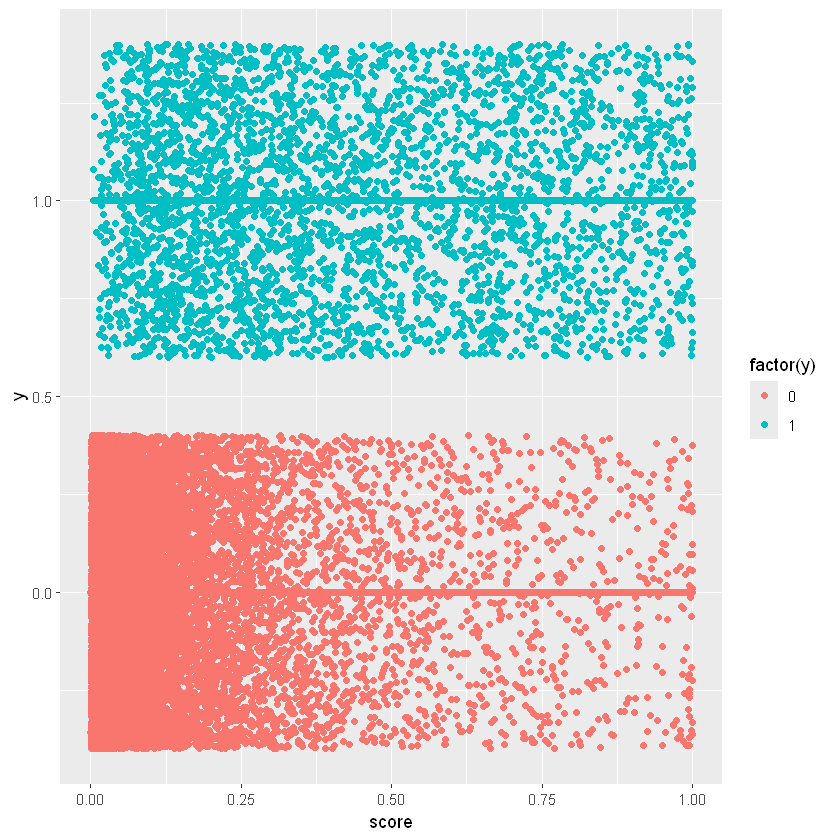

In [69]:
library(ggplot2)
ggplot(train,aes(y=y,x=score,color=factor(y)))+
  geom_point()+geom_jitter()

### 4.Finding Cutoff value and Perfomance measurements of the model.

lets find cutoff based on these probability scores.

In [70]:
cutoff_data=data.frame(cutoff=0,TP=0,FP=0,FN=0,TN=0)
cutoffs=seq(0,1,length=100)

In [71]:
for (i in cutoffs){
  predicted=as.numeric(train$score>i)
  
  TP=sum(predicted==1 & train$y==1)
  FP=sum(predicted==1 & train$y==0)
  FN=sum(predicted==0 & train$y==1)
  TN=sum(predicted==0 & train$y==0)
  cutoff_data=rbind(cutoff_data,c(i,TP,FP,FN,TN))
}
## lets remove the dummy data cotaining top row in data frame cutoff_data
cutoff_data=cutoff_data[-1,]
#we now have 100 obs in df cutoff_data

lets calculate the performance measures:sensitivity,specificity,accuracy, KS and precision.

In [72]:
cutoff_data=cutoff_data %>%
  mutate(P=FN+TP,N=TN+FP, #total positives and negatives
         Sn=TP/P, #sensitivity
         Sp=TN/N, #specificity
         KS=abs((TP/P)-(FP/N)),
         Accuracy=(TP+TN)/(P+N),
         Lift=(TP/P)/((TP+FP)/(P+N)),
         Precision=TP/(TP+FP),
         Recall=TP/P
  ) %>% 
  select(-P,-N)

lets view cutoff dataset:

### Lets find cutoff value based on ks MAXIMUM.

In [73]:
KS_cutoff=cutoff_data$cutoff[which.max(cutoff_data$KS)]
KS_cutoff

[1] 0.1111111

#### hence 0.1111111 is the cutoff value by ks max method.

### 5.Predict the final output on test dataset.(whether the client subscribe or no to term deposit)

lets predict test scores

In [92]:
library(dplyr)
library(car)
library(ggplot2)
library(pROC)

In [102]:
test$score=predict(fit_final,newdata =test,type = "response")#on final test dataset.

Predicting whether the client has subscribed or no in final test dataset.

In [104]:
test$left=as.numeric(test$score>KS_cutoff)#if score is greater dan cutoff then true(1) else false(0)
table(test$left)


    0     1 
10168  3396 

Thus final prediction is as follows:

In [76]:
test$leftfinal=factor(test$left,levels = c(0,1),labels=c("no","yes"))
table(test$leftfinal)


   no   yes 
10168  3396 

writing into csv file final output test$leftfinal

Thus 3396 customers out of 13564 subscribe to term deposit according to the model.

In [106]:
write.csv(test$leftfinal,"P5_sub_1.csv")

### Creating confusion matrix and find how good our model is (by predicting on test_25 dataset)

In [77]:
test_25$score=predict(fit_final,newdata =test_25,type = "response")

In [78]:
table(test_25$y,as.numeric(test_25$score>KS_cutoff))

   
       0    1
  0 5740 1238
  1  105  829

In [79]:
table(test_25$y)


   0    1 
6978  934 

here TP=770,TN=5888,FP=,FN=
Accuracy=(TP+TN)/(P+N):

In [80]:
a=(770+5888)/7912
a

[1] 0.8415066

Hence error will be:

In [81]:
1-a

[1] 0.1584934

Error is 15.85%.(according to ks method)

Lets plot the ROC curve:

In [85]:
install.packages("pROC")


Installing package into 'C:/Users/HomePC/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'plyr'




package 'plyr' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HomePC\AppData\Local\Temp\RtmpMXhJFu\downloaded_packages


In [86]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



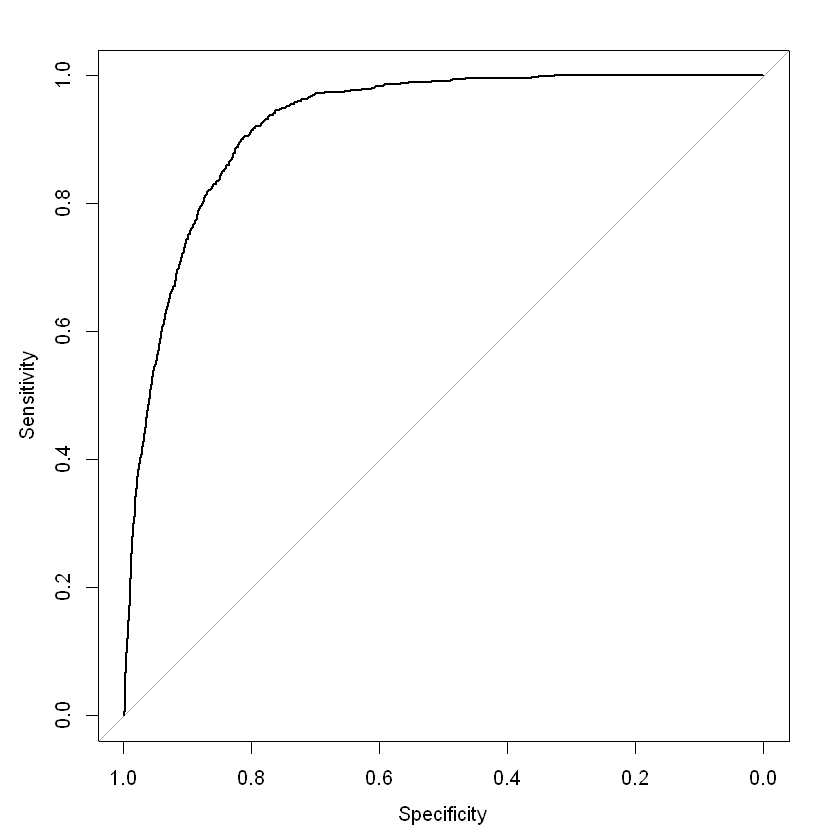

In [87]:
roccurve=roc(test_25$y,test_25$score) #real outcome and predicted score is plotted
plot(roccurve)

Thus area under the ROC curve is:

In [88]:
auc(roccurve)

Area under the curve: 0.9251

#### Conclusion:
Thus the target no. of customers to be focused upon for term deposits by the bank are predicted successfully using logistic regression model with an accuracy of 84.15% using KS method. The KS score examined came out to be: 0.72/1.00.